In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
test_labels = pd.read_csv('./test_labels.csv')
subm = pd.read_csv('./sample_submission.csv')

In [7]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [8]:
sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [5]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,d4de2a1dcd05a62d,::ok I'll just fuck off then. ok.
freq,1,1


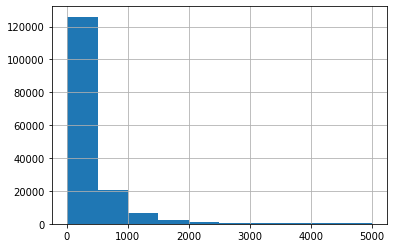

In [11]:
lens = train.comment_text.str.len()
lens.hist()

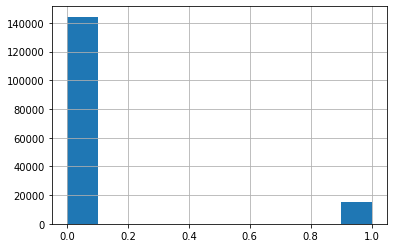

In [12]:
train['toxic'].hist()

In [15]:
train['toxic'].describe()

count    159571.000000
mean          0.095844
std           0.294379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: toxic, dtype: float64

In [14]:
train['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [10]:
X_train = train['comment_text']
X_test = test['comment_text']

In [11]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

label_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
preds = np.zeros((len(test), len(label_names)))
avg_score = 0.0
for i, label_name in enumerate(label_names):
    
    clf = Pipeline([
      ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3))),
      ('classification', LogisticRegression(random_state=0, solver='lbfgs',
                             multi_class='multinomial'))])
    
    y_train = train[label_name].values
    y_test = test_labels[label_name].values
    clf.fit(X_train, y_train)
    result = clf.predict_proba(X_test)
    preds[:,i] = result[:,1]
    
    idx = y_test != -1
    score = clf.score(X_test[idx], y_test[idx])
    avg_score += score
    print(label_name + ': ' + str(score))
print(avg_score/len(label_names))

In [50]:
submid = pd.DataFrame({'id': subm['id']})
submission = pd.concat([submid, pd.DataFrame(preds, columns=label_names)], axis=1)
submission.to_csv('submission1.csv', index=False)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import log_loss
sub = pd.read_csv('./submission1.csv')
avg_score = 0.0
label_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for i, label_name in enumerate(label_names):
    y_test = test_labels[label_name].values
    
    idx = y_test != -1
    score = mean_squared_log_error(y_test[idx], sub[label_name][idx])
    avg_score += score
    print(label_name + ': ' + str(score))
print(avg_score/len(label_names))

toxic: 0.02538929527749826
severe_toxic: 0.0027630678779896702
obscene: 0.012733213371565787
threat: 0.001269282753400223
insult: 0.013449993251635723
identity_hate: 0.0035743496636265275
0.009863200365952698
